In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Arial'

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_id = pd.read_excel('./data/Key_metabolites.xlsx', sheet_name='id')
df_data = pd.read_excel('./data/Key_metabolites.xlsx', sheet_name='dataset')

In [4]:
# Create a dictionary mapping "Features (RT_mz)" to "Identified compound"
feature_to_compound = dict(zip(df_id['Features (RT_mz)'], df_id['Identified compound']))
# Show a small sample of the dictionary
feature_to_compound


{'0.957_215.03285': 'Bergapten',
 '0.958_138.05499': 'Trigonelline',
 '11.128_283.06134': 'Glycitein',
 '14.279_441.37311': 'Soyasapogenol C',
 '1.206_124.03927': 'Niacin (Vitamin B3)',
 '1.176_130.08625': 'Pipecolic acid',
 '0.955_176.10289': 'Citrulline',
 '15.805_297.24358': 'Hydroxyoctadecenoic acid',
 '12.839_339.25073': 'Hydroperoxyeicosatrienoate',
 '11.77_331.24905': 'Trihydroxystearic acid',
 '13.355_315.25417': 'Dihydroxyoctadecanoic acid',
 '14.913_295.22793': 'Hydroxyoctadecadienoic acid',
 '1.447_175.02483': 'Glucuronolactone',
 '1.026_133.01428': 'Malic acid',
 '1.114_134.04726': 'Adenine (Pos)',
 '1.131_136.0618': 'Adenine (Neg)',
 '0.996_246.18116': 'Valine lysine dipeptide',
 '0.954_149.04557': 'Arabinose'}

In [5]:
orders = ['Control', 'Chickpea']
g_colors = [ 'lightcoral', 'lightseagreen']

In [6]:
df_hydro = df_id[df_id['Putative source'] == 'Hydrolysis product']['Features (RT_mz)'].to_list()
df_hydro

['0.996_246.18116', '0.954_149.04557']

In [7]:
def get_group_figure_rev3(
        dataset: pd.DataFrame,
        dict_id: dict,
        order: list,
        feature_order: list,
        palette='Pastel1', figsize=(9, 10), top_alpha=1.2, is_save_file=False, dpi=600, x_label_rotation='45', ha='ha',
        save_name='a',
        yticks_range = False,
        relative_to_control=False,
        ylim_range = False
    ):

    plt.figure(figsize=figsize)

    if relative_to_control:
        dataset = dataset.copy()
        for feat in feature_order:
            control_mean = dataset.loc[dataset['Label'] == 'Control', feat].mean()
            dataset[feat] = dataset[feat] / control_mean


    for i, feat in enumerate(feature_order):
        plt.subplot(5, 5, i + 1)
  
        sns.stripplot(data=dataset, x='Label', y=feat, order=order, jitter=True, palette=palette, edgecolor="gray", linewidth=1)      
        sns.boxplot(data=dataset, x='Label', y=feat, order=order, palette=palette, showfliers=False)           

        plt.xlabel('')
        plt.ylabel('')
        plt.yticks(fontsize=9)
        plt.title(f'{dict_id[feat]}\n{feat}', fontdict={'fontsize': 9})
        plt.xticks(fontsize=9)
        bottom, top = plt.ylim()
        plt.ylim(bottom * 0.9, top * top_alpha)

        if yticks_range:
            plt.yticks(yticks_range, fontsize=9)

        if ylim_range:
            plt.ylim(ylim_range)


    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1.1)

    if is_save_file:
        plt.savefig(f'figure_{save_name}.png', dpi=dpi)
        print('figure.png file is saved')

    plt.show()


In [8]:
df_hydro = df_id[df_id['Putative source'] == 'Hydrolysis product']['Features (RT_mz)'].to_list()
df_hydro

['0.996_246.18116', '0.954_149.04557']

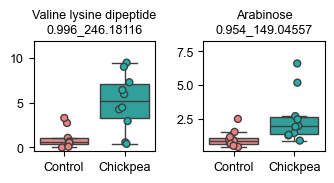

In [9]:
get_group_figure_rev3(df_data, feature_to_compound, order=['Control', 'Chickpea'], palette=g_colors, top_alpha=1.2, 
                         is_save_file=False, save_name='hydrolysis_product', ha='right', figsize=(10, 13), feature_order=df_hydro,  relative_to_control=True)

In [10]:
df_phyto = df_id[df_id['Putative source'] == 'Native phytochemical']['Features (RT_mz)'].to_list()
df_phyto

['0.957_215.03285',
 '0.958_138.05499',
 '11.128_283.06134',
 '14.279_441.37311',
 '1.206_124.03927']

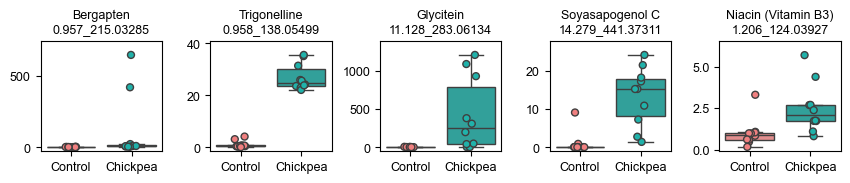

In [11]:
get_group_figure_rev3(df_data, feature_to_compound, order=['Control', 'Chickpea'], palette=g_colors, top_alpha=1.1, 
                         is_save_file=False, save_name='phyto', ha='right', figsize=(10, 13), feature_order=df_phyto,  relative_to_control=True)

In [12]:
df_hfa = df_id[df_id['Class'] == 'Fatty Acyls']['Features (RT_mz)'].to_list()
df_hfa

['15.805_297.24358',
 '12.839_339.25073',
 '11.77_331.24905',
 '13.355_315.25417',
 '14.913_295.22793']

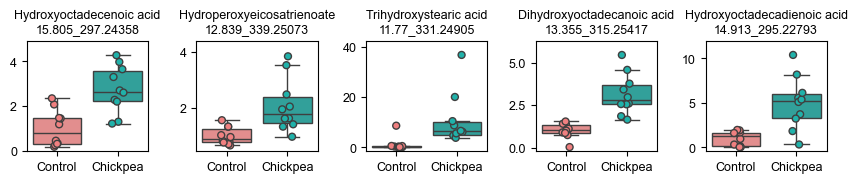

In [13]:
get_group_figure_rev3(df_data, feature_to_compound, order=['Control', 'Chickpea'], palette=g_colors, top_alpha=1.1, 
                         is_save_file=False, save_name='phyto', ha='right', figsize=(10, 13), feature_order=df_hfa,  relative_to_control=True)